### HO 3:

There is no difference in certification rates between US ECONOMIC STEM SECTORS and NON_STEM SECTORS.


### HA 3: 

There is a difference in certification rates between US ECONOMIC STEM SECTORS and NON_STEM SECTORS.



### METHODOLOGY

-Tested Chi2 on two individual industries.

-Grouped together STEM SECTORS and NON-STEM SECTORS.

-Took the certified and denied applicant counts for each group and created a two-dimensional array. 

-Ran Chi2 test on certified and denied applicant two dimensional array. 


In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import chi2
import matplotlib.pyplot as plt


In [56]:
df = pd.read_csv('visa_clean.csv')

In [57]:
df.head(2)

,Unnamed: 0,application_type,case_received_date,case_status,class_of_admission,decision_date,employer_city,employer_name,employer_num_employees,employer_state,...,foreign_worker_birth_country,foreign_worker_edu_other,foreign_worker_rel_occ_exp,foreign_worker_req_exp,naics_num,naics_title,wage_offer_from,wage_offer_to,wage_unit_of_pay_offer,pw_job_title
0,0,PERM,NaN,Certified,J-1,2012-02-01,NEW YORK,NETSOFT USA INC.,NaN,NY,...,NaN,NaN,NaN,NaN,541512,COMPUTER SYSTEMS DESIGN SERVICES,75629,NaN,Year,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS"
1,1,PERM,NaN,Denied,B-2,2011-12-21,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NaN,NY,...,NaN,NaN,NaN,NaN,562211,HAZARDOUS WASTE TREATMENT AND DISPOSAL,37024,NaN,Year,ASBESTOS HANDLER


In [58]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 31 columns):
application_type                 135269 non-null object
case_received_date               239091 non-null object
case_status                      374362 non-null object
class_of_admission               351517 non-null object
decision_date                    374362 non-null object
employer_city                    374348 non-null object
employer_name                    374350 non-null object
employer_num_employees           239013 non-null float64
employer_state                   374320 non-null object
foreign_worker_info_city         239065 non-null object
foreign_worker_info_education    239053 non-null object
foreign_worker_info_state        221898 non-null object
pw_amount_9089                   372146 non-null object
pw_level_9089                    346735 non-null object
pw_soc_code                      373965 non-null object
pw_soc_title                     372026 non-null

In [60]:
df1 = df[['us_economic_sector','case_status', 'class_of_admission']]

In [61]:
df1.dropna(axis=0, inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df1.case_status = df1.case_status.replace({'Certified': 1, 'Certified-Expired': 1, 'Withdrawn': 0,'Denied': 0})

In [63]:
aero_df = df1[df1['us_economic_sector']== 'AEROSPACE']

In [64]:
aero_cert = aero_df[aero_df['case_status'] == 1].case_status.count()

In [65]:
aero_denied = aero_df[aero_df['case_status'] == 0].case_status.count()

aero_cert: 3518

aero_denied: 471

In [66]:
manu_df = df1[df1['us_economic_sector']== 'ADVANCED MFG']

In [67]:
mfg_cert = manu_df[manu_df['case_status'] == 1].case_status.count()

In [68]:
mfg_denied = manu_df[manu_df['case_status'] == 0].case_status.count()

mfg_cert: 16160

mfg_denied: 2044


In [69]:
certified = [aero_cert, mfg_cert]
denied = [aero_denied, mfg_denied]

In [70]:
industry_chi2 = np.array([certified, denied])
industry_chi2

array([[ 3518, 16160],
       [  471,  2044]])

In [71]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(industry_chi2)

In [72]:
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)


===Chi2 Stat===
1.0354128803556033


===Degrees of Freedom===
1


===P-Value===
0.30889071962446873


===Contingency Table===
[[ 3536.95047988 16141.04952012]
 [  452.04952012  2062.95047988]]


In [123]:
def visualize_chisq(chisq_stat, df, alpha):
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    # get the current "axis" out of the figure
    ax = fig.gca()
    xs = np.linspace(0, 25, 25)
    ys = stats.chi2.pdf(xs, df)
    ax.plot(xs, ys, 'r-', lw=5, alpha=alpha, label='chi2 pdf')
    # plot the lines using matplotlib's plot function:
    ax.plot(xs, ys, linewidth=3, color='darkblue')
    # plot a vertical line for our measured difference in rates t-statistic
    ax.axvline(chisq_stat, color='red', linestyle='--', lw=5,label='chi-sq-statistic')
    chi_sq_crit = stats.chi2.ppf(1-alpha, df)
    ax.plot(xs, ys, linewidth=3, color='darkblue')
    ax.axvline(chi_sq_crit,color='green',linestyle='--',lw=4,label='crit chi-sq-value')
    ax.fill_betweenx(ys,xs,chi_sq_crit,where = xs > chi_sq_crit)
    
    ax.legend()
    plt.show()
    return None




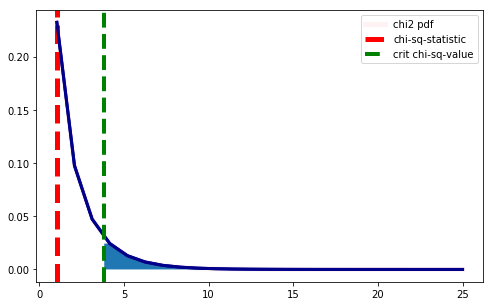

In [124]:
visualize_chisq(1.0354128803556033, df=1, alpha=0.05)

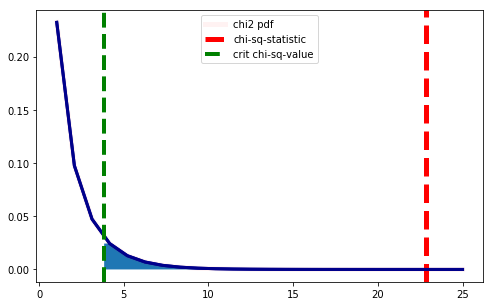

In [107]:
def visualize_chisq(chisq_stat, df, alpha):
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    # get the current "axis" out of the figure
    ax = fig.gca()
    xs = np.linspace(0, 25, 25)
    ys = stats.chi2.pdf(xs, df)
    ax.plot(xs, ys, 'r-', lw=5, alpha=alpha, label='chi2 pdf')
    # plot the lines using matplotlib's plot function:
    ax.plot(xs, ys, linewidth=3, color='darkblue')
    # plot a vertical line for our measured difference in rates t-statistic
    ax.axvline(chisq_stat, color='red', linestyle='--', lw=5,label='chi-sq-statistic')
    chi_sq_crit = stats.chi2.ppf(1-alpha, df)
    ax.plot(xs, ys, linewidth=3, color='darkblue')
    ax.axvline(chi_sq_crit,color='green',linestyle='--',lw=4,label='crit chi-sq-value')
    ax.fill_betweenx(ys,xs,chi_sq_crit,where = xs > chi_sq_crit)
    
    ax.legend()
    plt.show()
    return None
visualize_chisq(chi2_stat, df=1, alpha=0.05)



In [108]:
list(df1.us_economic_sector.unique())

['IT',
 'OTHER ECONOMIC SECTOR',
 'AEROSPACE',
 'ADVANCED MFG',
 'EDUCATIONAL SERVICES',
 'RETAIL',
 'CONSTRUCTION',
 'HOSPITALITY',
 'HEALTH CARE',
 'FINANCE',
 'ENERGY',
 'TRANSPORTATION',
 'HOMELAND SECURITY',
 'AUTOMOTIVE',
 'AGRIBUSINESS',
 'BIOTECHNOLOGY',
 'GEOSPATIAL']

In [109]:
STEM = ['IT','AEROSPACE', 'ADVANCED MFG','ENERGY','BIOTECHNOLOGY','GEOSPATIAL','AGRIBUSINESS','AUTOMOTIVE']
NON_STEM = ['EDUCATIONAL SERVICES','RETAIL','CONSTRUCTION','HOSPITALITY','HEALTH CARE','FINANCE','TRANSPORTATION']

In [110]:
stem_df = df1[df1.us_economic_sector.isin(STEM)]

In [111]:
stem_df = stem_df.reset_index()
stem_df.drop(columns=['index'], inplace=True)

In [112]:
stem_df.head()

,us_economic_sector,case_status,class_of_admission
0,IT,1,J-1
1,AEROSPACE,1,H-1B
2,ADVANCED MFG,1,L-1
3,ADVANCED MFG,0,E-2
4,IT,1,H-1B


In [113]:
stem_df[stem_df['case_status'] == 1].case_status.count()

66052

In [114]:
stem_df[stem_df['case_status'] == 0].case_status.count()

10028

In [115]:
non_stem_df = df1[df1.us_economic_sector.isin(NON_STEM)]

In [116]:
non_stem_df[non_stem_df['case_status'] == 1].case_status.count()

27414

In [117]:
non_stem_df[non_stem_df['case_status'] == 0].case_status.count()

4564

In [118]:
certified = [66052, 27414]
denied = [10028, 4564]

In [119]:
chi2 = np.array([certified, denied])
chi2

array([[66052, 27414],
       [10028,  4564]])

In [120]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(chi2)

In [121]:
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)


===Chi2 Stat===
22.86908503257289


===Degrees of Freedom===
1


===P-Value===
1.7341877760642102e-06


===Contingency Table===
[[65806.26404338 27659.73595662]
 [10273.73595662  4318.26404338]]


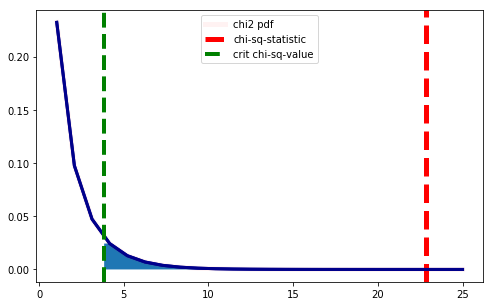

In [126]:
visualize_chisq(chisq_stat=22.869085, df=1, alpha=.05)